In [52]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np
import squarify

In [53]:
outprefix = "Lineage_data_Uganda_Figure1"
this_font_scale=0.1
df1 = pd.read_csv('Lineage_data_Uganda_Figure1.csv', sep=",", na_values=['-'])
df1.head()
df1

,Genome_number,Lineage,Date_Sample_collected,Period_4
0,1,A,25/03/2020,1
1,2,A,26/03/2020,1
2,3,B.1,26/03/2020,1
3,4,B.1.1,27/03/2020,1
4,5,A,04/04/2020,1
...,...,...,...,...
297,298,B.1,07/05/2020,1
298,299,A,04/05/2020,1
299,300,B.1,01/05/2020,1
300,301,B.1,02/05/2020,1


In [54]:
lineage_list = list(sorted(df1['Lineage'].unique()))
print (str(len(lineage_list)))
lineage_list

18


['A',
 'A.20',
 'A.22',
 'A.23',
 'A.23.1',
 'A.25',
 'B',
 'B.1',
 'B.1.1',
 'B.1.1.1',
 'B.1.1.161',
 'B.1.1.27',
 'B.1.222',
 'B.1.393',
 'B.1.5',
 'B.2',
 'B.2.4',
 'B.4']

In [55]:
df1['Lineage'].value_counts()

A.23.1       115
A.23          69
B.1           55
A.25          16
A              8
B.1.1.1        7
B.1.1.27       6
B.1.1          5
B              4
B.4            3
B.2            3
B.1.222        3
B.2.4          2
B.1.393        2
A.22           1
B.1.1.161      1
A.20           1
B.1.5          1
Name: Lineage, dtype: int64

In [56]:
df2 = df1['Lineage'].value_counts().to_frame()
df2

,Lineage
A.23.1,115
A.23,69
B.1,55
A.25,16
A,8
B.1.1.1,7
B.1.1.27,6
B.1.1,5
B,4
B.4,3


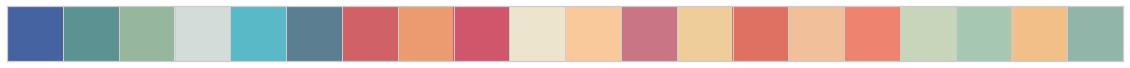

In [57]:
blue_orange = ["#4562a1","#5c9291","#96b69e","#d4dcda","#59b9c6","#5b7e91","#d06267","#eb9b6f","#d0576b","#ede4cd","#f9c89b","#c97586","#efcd9a","#df7163","#f1bf99","#ee836f","#c8d5bb","#a6c8b2","#f3bf88","#92b5a9"]
sns.palplot(sns.color_palette(blue_orange))

In [58]:
lineage_color_dict = dict(zip(lineage_list, blue_orange))
lineage_color_dict

{'A': '#4562a1',
 'A.20': '#5c9291',
 'A.22': '#96b69e',
 'A.23': '#d4dcda',
 'A.23.1': '#59b9c6',
 'A.25': '#5b7e91',
 'B': '#d06267',
 'B.1': '#eb9b6f',
 'B.1.1': '#d0576b',
 'B.1.1.1': '#ede4cd',
 'B.1.1.161': '#f9c89b',
 'B.1.1.27': '#c97586',
 'B.1.222': '#efcd9a',
 'B.1.393': '#df7163',
 'B.1.5': '#f1bf99',
 'B.2': '#ee836f',
 'B.2.4': '#c8d5bb',
 'B.4': '#a6c8b2'}

In [59]:
period_is_1_of_4 = df1['Period_4'] == 1
df2_period1_of_4 = df1.loc[period_is_1_of_4]
df2_period1_of_4 = df2_period1_of_4['Lineage'].value_counts().to_frame()
df2_period1_of_4['Lineage_ID'] = df2_period1_of_4.index
df2_period1_of_4['Color'] = df2_period1_of_4['Lineage_ID'].map(lineage_color_dict.get) #adds column with order
df2_period1_of_4.head()

,Lineage,Lineage_ID,Color
B.1,21,B.1,#eb9b6f
A,7,A,#4562a1
B.1.1,5,B.1.1,#d0576b
B,4,B,#d06267
B.2,3,B.2,#ee836f


In [60]:
period_is_2_of_4 = df1['Period_4'] == 2
df2_period2_of_4 = df1.loc[period_is_2_of_4]
df2_period2_of_4 = df2_period2_of_4['Lineage'].value_counts().to_frame()
df2_period2_of_4['Lineage_ID'] = df2_period2_of_4.index
df2_period2_of_4['Color'] = df2_period2_of_4['Lineage_ID'].map(lineage_color_dict.get) #adds column with order
df2_period2_of_4.head()

,Lineage,Lineage_ID,Color
B.1,32,B.1,#eb9b6f
A.23,25,A.23,#d4dcda
A.25,12,A.25,#5b7e91
A,1,A,#4562a1
B.1.1.1,1,B.1.1.1,#ede4cd


In [61]:
period_is_3_of_4 = df1['Period_4'] == 3
df2_period3_of_4 = df1.loc[period_is_3_of_4]
df2_period3_of_4 = df2_period3_of_4['Lineage'].value_counts().to_frame()
df2_period3_of_4['Lineage_ID'] = df2_period3_of_4.index
df2_period3_of_4['Color'] = df2_period3_of_4['Lineage_ID'].map(lineage_color_dict.get) #adds column with order
df2_period3_of_4

,Lineage,Lineage_ID,Color
A.23,39,A.23,#d4dcda
A.23.1,13,A.23.1,#59b9c6
B.1.1.27,6,B.1.1.27,#c97586
B.1.1.1,4,B.1.1.1,#ede4cd
A.25,3,A.25,#5b7e91
B.1.393,2,B.1.393,#df7163
B.1.222,1,B.1.222,#efcd9a


In [62]:
period_is_4_of_4 = df1['Period_4'] == 4
df2_period4_of_4 = df1.loc[period_is_4_of_4]
df2_period4_of_4 = df2_period4_of_4['Lineage'].value_counts().to_frame()
df2_period4_of_4['Lineage_ID'] = df2_period4_of_4.index
df2_period4_of_4['Color'] = df2_period4_of_4['Lineage_ID'].map(lineage_color_dict.get) #adds column with order
df2_period4_of_4.head()

,Lineage,Lineage_ID,Color
A.23.1,102,A.23.1,#59b9c6
A.23,5,A.23,#d4dcda
B.1.222,2,B.1.222,#efcd9a
B.1,2,B.1,#eb9b6f
B.1.1.161,1,B.1.1.161,#f9c89b


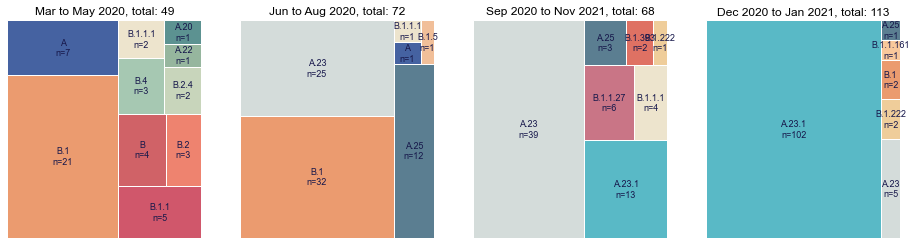

In [63]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(16, 4))
plt.rcParams['text.color']= '#17184b' #a blue
plt.rc('font', size=9)

plt.subplot(1, 4, 1)
volume1 = list(df2_period1_of_4.Lineage)
labels1 = list(df2_period1_of_4.Lineage_ID)
color_list1 = list(df2_period1_of_4.Color)
total_period1 = sum(df2_period1_of_4.Lineage)
complete_label_list1 =[]
for i in range(len(labels1)):
    new_label1 = labels1[i]+"\nn="+str(volume1[i])
    complete_label_list1.append(new_label1)

squarify.plot(sizes=volume1, label=complete_label_list1,
              color=color_list1, alpha=1)

plt.axis('off')
plt.title('Mar to May 2020, total: '+str(total_period1),size=12, color = 'black')

plt.subplot(1, 4, 2)
volume2 = list(df2_period2_of_4.Lineage)
labels2 = list(df2_period2_of_4.Lineage_ID)
color_list2 = list(df2_period2_of_4.Color)
total_period2 = sum(df2_period2_of_4.Lineage)

complete_label_list2 =[]
for i in range(len(labels2)):
    new_label2 = labels2[i]+"\nn="+str(volume2[i])
    complete_label_list2.append(new_label2)
    
squarify.plot(sizes=volume2, label=complete_label_list2,
              color=color_list2, alpha=1)
plt.axis('off')
plt.title('Jun to Aug 2020, total: '+str(total_period2),size=12, color = 'black')

plt.subplot(1, 4, 3)
volume3 = list(df2_period3_of_4.Lineage)
labels3 = list(df2_period3_of_4.Lineage_ID)
color_list3 = list(df2_period3_of_4.Color)
total_period3 = sum(df2_period3_of_4.Lineage)

complete_label_list3 =[]
for i in range(len(labels3)):
    new_label3 = labels3[i]+"\nn="+str(volume3[i])
    complete_label_list3.append(new_label3)

squarify.plot(sizes=volume3, label=complete_label_list3,
              color=color_list3, alpha=1)
plt.axis('off')
plt.title('Sep 2020 to Nov 2021, total: '+str(total_period3),size=12, color = 'black')


plt.subplot(1, 4, 4)
volume4 = list(df2_period4_of_4.Lineage)
labels4 = list(df2_period4_of_4.Lineage_ID)
color_list4 = list(df2_period4_of_4.Color)
total_period4 = sum(df2_period4_of_4.Lineage)

complete_label_list4 =[]
for i in range(len(labels4)):
    new_label4 = labels4[i]+"\nn="+str(volume4[i])
    complete_label_list4.append(new_label4)
    
squarify.plot(sizes=volume4, label=complete_label_list4,
              color=color_list4, alpha=1)
plt.axis('off')
plt.title('Dec 2020 to Jan 2021, total: '+str(total_period4),size=12, color = 'black')

plt.savefig(outprefix+'_Uganda_SARS-CoV-2_lineages_treemap_4Periods.pdf',bbox_inches="tight")
plt.savefig(outprefix+'_Uganda_SARS-CoV-2_lineages_treemap_4Periods.jpg',bbox_inches="tight", dpi=300)##  from here https://jingwen-z.github.io/data-viz-with-matplotlib-series5-treemap/
